In [615]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

%matplotlib inline

In [116]:
house_data = pd.read_csv("training_set.csv")

In [117]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,20141027T000000,390000,4,1.75,2330,8364,1.0,0,0,...,8,2330,0,1968,0,98058,47.4568,-122.146,2180.0,9630.0
1,7100000250,20150211T000000,380000,3,1.00,1400,8710,1.0,0,0,...,7,1400,0,1948,0,98146,47.5066,-122.377,1460.0,8710.0
2,1443500725,20150423T000000,280000,3,1.00,1350,7553,1.5,0,0,...,6,1350,0,1914,0,98118,47.5345,-122.274,1380.0,7470.0
3,2321059093,20140805T000000,506000,3,2.50,2100,213008,1.0,0,0,...,8,2100,0,1990,0,98092,47.2984,-122.144,1330.0,214315.0
4,6675500082,20140812T000000,455000,3,2.50,1600,7829,2.0,0,0,...,7,1600,0,1987,0,98034,47.7288,-122.227,1580.0,9104.0


In [118]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.600000e+04,1.600000e+04,16000.000000,16000.00000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15999.000000,15999.000000,15999.000000
mean,4.577050e+09,5.389266e+05,3.371875,2.09675,2071.998000,1.513216e+04,1.470000,0.007437,0.237687,3.425063,7.637375,1775.186187,296.811812,1969.656563,90.300062,98077.791500,47.560614,-122.214162,1984.452903,12807.790424
std,2.871337e+09,3.689265e+05,0.933415,0.76102,906.540138,3.936487e+04,0.528996,0.085922,0.770701,0.660047,1.172322,816.283649,446.135983,28.908309,414.811627,53.747044,0.138874,0.139513,680.831264,26563.208232
min,1.000102e+06,7.500000e+04,0.000000,0.00000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.000000,-122.519000,460.000000,659.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.50000,1420.000000,5.150000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469950,-122.327000,1490.000000,5200.000000
50%,3.904920e+09,4.500000e+05,3.000000,2.25000,1910.000000,7.703000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1973.000000,0.000000,98065.000000,47.573250,-122.229000,1840.000000,7695.000000
75%,7.304300e+09,6.450000e+05,4.000000,2.50000,2540.000000,1.080175e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,580.000000,1994.000000,0.000000,98117.000000,47.678600,-122.125000,2350.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.00000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [119]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [120]:
# Apply log to price column
house_data['price'] = np.log10(house_data['price'])
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,20141027T000000,5.591065,4,1.75,2330,8364,1.0,0,0,...,8,2330,0,1968,0,98058,47.4568,-122.146,2180.0,9630.0
1,7100000250,20150211T000000,5.579784,3,1.00,1400,8710,1.0,0,0,...,7,1400,0,1948,0,98146,47.5066,-122.377,1460.0,8710.0
2,1443500725,20150423T000000,5.447158,3,1.00,1350,7553,1.5,0,0,...,6,1350,0,1914,0,98118,47.5345,-122.274,1380.0,7470.0
3,2321059093,20140805T000000,5.704151,3,2.50,2100,213008,1.0,0,0,...,8,2100,0,1990,0,98092,47.2984,-122.144,1330.0,214315.0
4,6675500082,20140812T000000,5.658011,3,2.50,1600,7829,2.0,0,0,...,7,1600,0,1987,0,98034,47.7288,-122.227,1580.0,9104.0
5,2723069082,20150424T000000,5.896802,4,2.25,2510,133729,2.0,0,0,...,8,2510,0,1977,0,98027,47.4569,-122.020,2510.0,69696.0
6,7559600430,20141111T000000,5.806180,5,2.50,3220,4759,2.0,0,0,...,8,3220,0,2003,0,98075,47.5957,-122.032,2550.0,4759.0
7,1972200847,20140718T000000,5.795880,3,2.50,1730,1301,3.0,0,0,...,9,1730,0,2011,0,98103,47.6530,-122.352,1330.0,1240.0
8,6870000150,20141218T000000,5.830589,4,2.50,2820,4174,2.0,0,0,...,9,2820,0,2004,0,98034,47.7112,-122.226,2560.0,4853.0
9,272000320,20141105T000000,5.599883,3,1.50,1310,2996,2.0,0,0,...,7,1310,0,1998,0,98144,47.5879,-122.299,1310.0,2997.0


In [122]:
house_data.shape

(16000, 21)

In [123]:
# removing Duplicates if present
house_data.drop_duplicates(inplace = True)
house_data.shape

(16000, 21)

In [127]:
# Checking for null values
print(house_data.isnull().values.any())

True


In [128]:
# Find the null values
df1 = house_data[house_data.isnull().any(axis=1)]

In [129]:
df1.shape

(1, 21)

In [130]:
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11184,2225069036,20140815T000000,5.966142,4,3.25,3640,60086,2.0,0,0,...,10,3640,0,2005,0,98074,47.0,NaN,NaN,NaN


In [132]:
house_data = house_data.dropna(axis = 0, how = 'any')
# drop rows with empty values. axis = 0 indicates rows; 1 indicates columns
# how = any indicates delete any row or column whose value which is empty; all indicates delete any row or columns with all empty values
house_data.shape

(15999, 21)

In [133]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Data columns (total 21 columns):
id               15999 non-null int64
date             15999 non-null object
price            15999 non-null float64
bedrooms         15999 non-null int64
bathrooms        15999 non-null float64
sqft_living      15999 non-null int64
sqft_lot         15999 non-null int64
floors           15999 non-null float64
waterfront       15999 non-null int64
view             15999 non-null int64
condition        15999 non-null int64
grade            15999 non-null int64
sqft_above       15999 non-null int64
sqft_basement    15999 non-null int64
yr_built         15999 non-null int64
yr_renovated     15999 non-null int64
zipcode          15999 non-null int64
lat              15999 non-null float64
long             15999 non-null float64
sqft_living15    15999 non-null float64
sqft_lot15       15999 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 2.7+ MB


In [332]:
np.sort(house_data.grade.unique())

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

C:\Users\nisha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


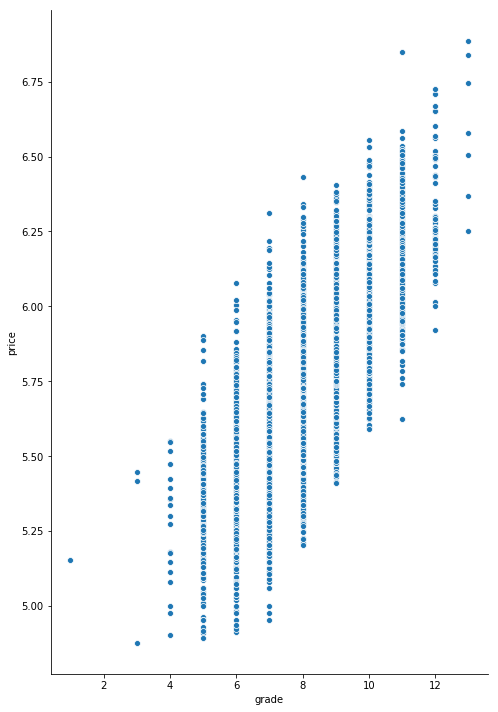

In [315]:
sns.pairplot(house_data, x_vars='grade', y_vars='price', size=10, aspect=0.7)

C:\Users\nisha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


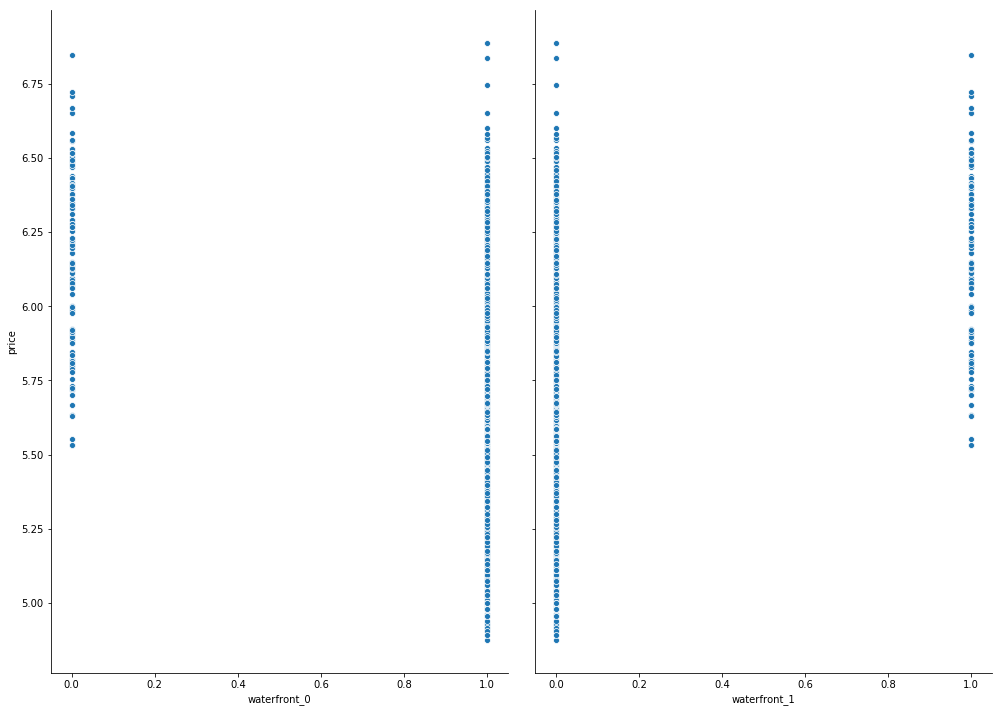

In [637]:
sns.pairplot(house_data, x_vars=['waterfront_0','waterfront_1'], y_vars='price', size=10, aspect=0.7)

C:\Users\nisha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


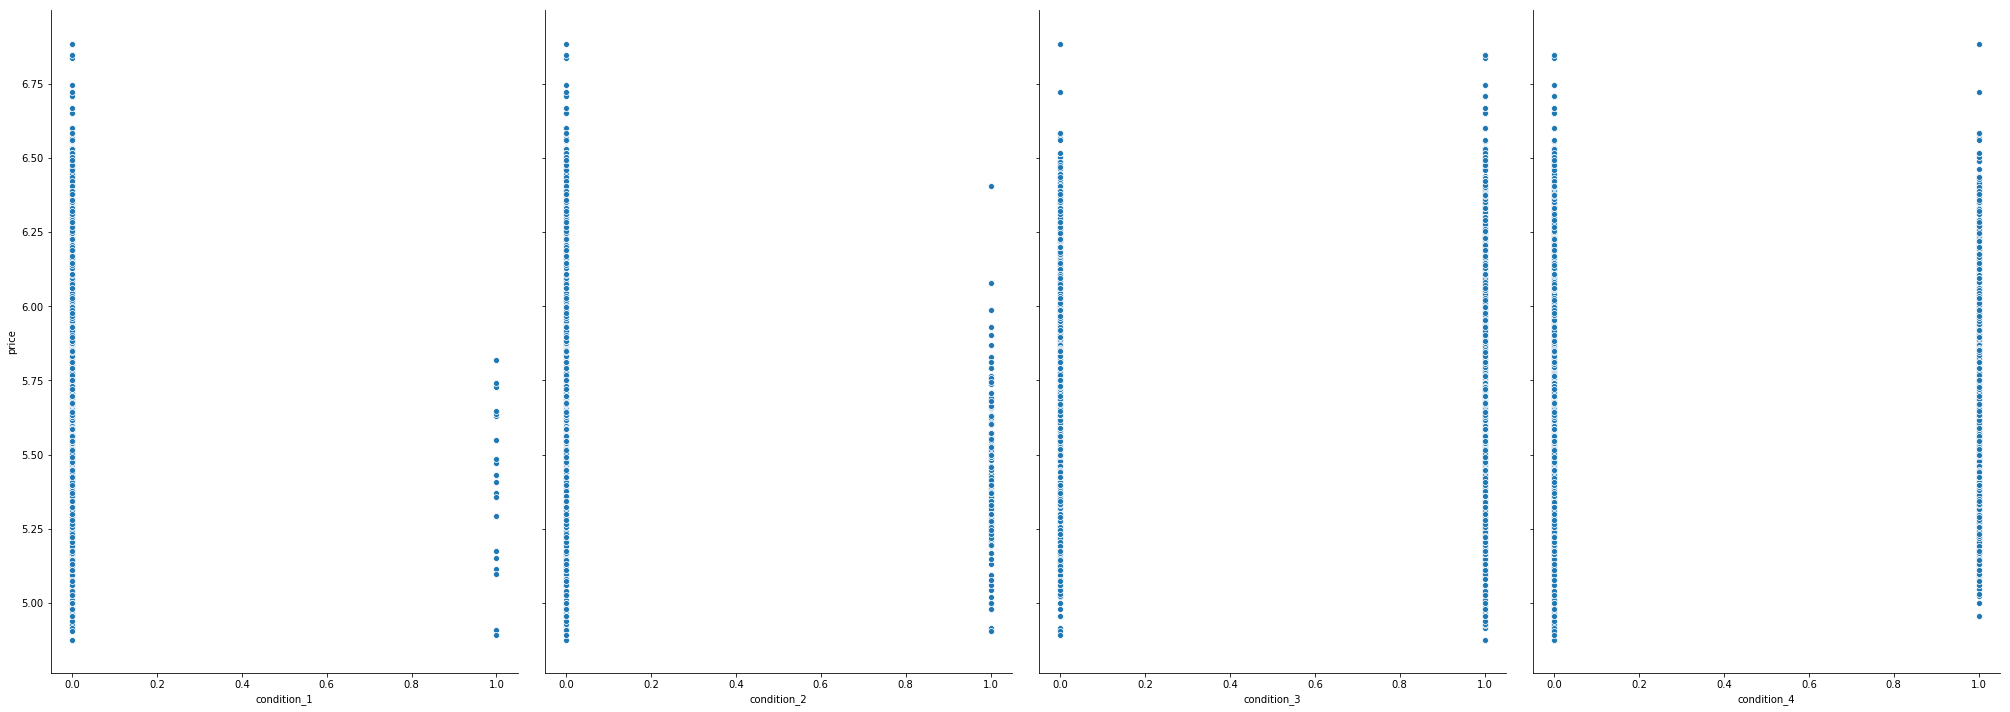

In [638]:
sns.pairplot(house_data, x_vars=['condition_1','condition_2','condition_3','condition_4'], y_vars='price', size=10, aspect=0.7)

C:\Users\nisha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


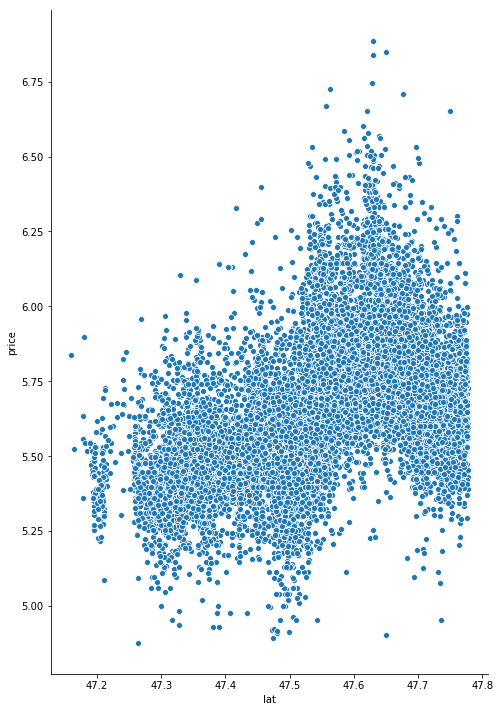

In [639]:
sns.pairplot(house_data, x_vars='lat', y_vars='price', size=10, aspect=0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED12161160>,
      dtype=object)

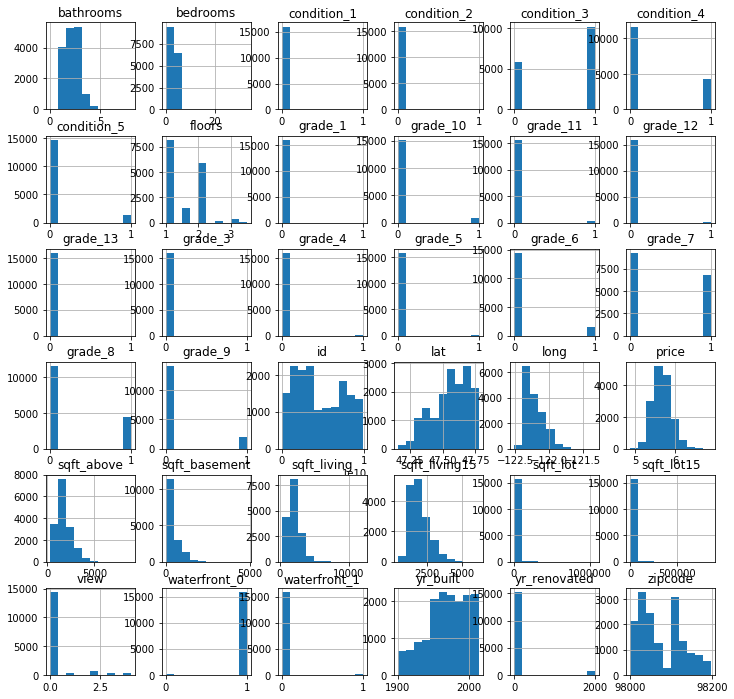

In [443]:
#histograms
pd.DataFrame.hist(house_data,figsize=(12,12))

In [340]:
# Convert grade to Category and add dummy variables
house_data['grade'] = pd.Categorical(house_data["grade"])
house_data['waterfront'] = pd.Categorical(house_data["waterfront"])
house_data['condition'] = pd.Categorical(house_data["condition"])

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Data columns (total 21 columns):
id               15999 non-null int64
date             15999 non-null object
price            15999 non-null float64
bedrooms         15999 non-null int64
bathrooms        15999 non-null float64
sqft_living      15999 non-null int64
sqft_lot         15999 non-null int64
floors           15999 non-null float64
waterfront       15999 non-null category
view             15999 non-null int64
condition        15999 non-null category
grade            15999 non-null category
sqft_above       15999 non-null int64
sqft_basement    15999 non-null int64
yr_built         15999 non-null int64
yr_renovated     15999 non-null int64
zipcode          15999 non-null int64
lat              15999 non-null float64
long             15999 non-null float64
sqft_living15    15999 non-null float64
sqft_lot15       15999 non-null float64
dtypes: category(3), float64(7), int64(10), object(1)
memory usage: 3

C:\Users\nisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


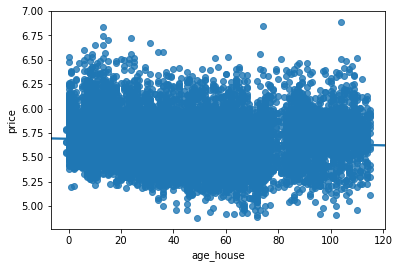

In [445]:
# Calculating age of house from yr_built
house_data['year_sold'] = house_data['date'].apply(lambda x: int(x[:4]))
house_data['age_house'] = house_data[['year_sold']].sub(house_data['yr_built'], axis = 0)
sns.regplot(x = "age_house", y = "price", data = house_data)

In [455]:
# is renovated columns
house_data['Is_renovated'] = house_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [457]:

house_data['Is_renovated'] = pd.Categorical(house_data["Is_renovated"])

In [481]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Columns: 109 entries, id to zipcode_98199
dtypes: category(1), float64(7), int64(11), object(1), uint8(89)
memory usage: 4.4+ MB


In [485]:
list(house_data.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0',
 'waterfront_1',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_1',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'year_sold',
 'age_house',
 'Is_renovated',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_

In [478]:
# change zipcode to category
house_data['zipcode'] = pd.Categorical(house_data["zipcode"])

In [480]:
# zipcode dummy variables

house_data = pd.get_dummies(house_data, columns = ['zipcode'], prefix = ['zipcode'])

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Columns: 109 entries, id to zipcode_98199
dtypes: category(1), float64(7), int64(11), object(1), uint8(89)
memory usage: 4.4+ MB


In [381]:
# dummy variables creation

house_data = pd.get_dummies(house_data, columns = ['waterfront','condition','grade'], prefix = ['waterfront','condition','grade'])

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Data columns (total 37 columns):
id               15999 non-null int64
date             15999 non-null object
price            15999 non-null float64
bedrooms         15999 non-null int64
bathrooms        15999 non-null float64
sqft_living      15999 non-null int64
sqft_lot         15999 non-null int64
floors           15999 non-null float64
view             15999 non-null int64
sqft_above       15999 non-null int64
sqft_basement    15999 non-null int64
yr_built         15999 non-null int64
yr_renovated     15999 non-null int64
zipcode          15999 non-null int64
lat              15999 non-null float64
long             15999 non-null float64
sqft_living15    15999 non-null float64
sqft_lot15       15999 non-null float64
waterfront_0     15999 non-null uint8
waterfront_1     15999 non-null uint8
condition_1      15999 non-null uint8
condition_2      15999 non-null uint8
condition_3      15999 non-null uint8
co

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log


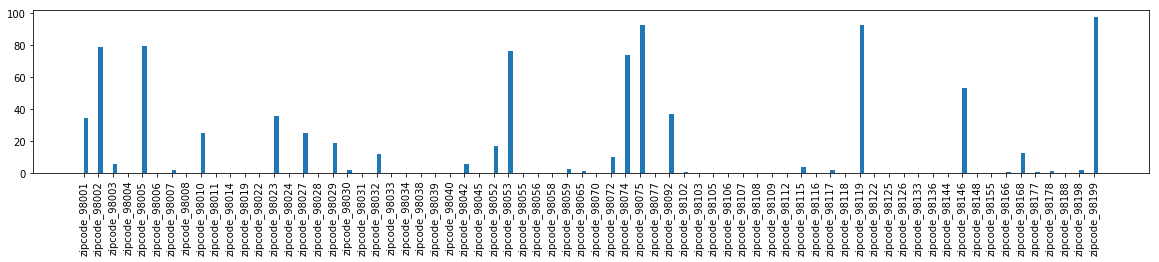

In [488]:
# Selecting zipcodees
from sklearn.feature_selection import SelectKBest, f_classif

predictors =  ['zipcode_98001','zipcode_98002', 'zipcode_98003','zipcode_98004','zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199']
selector = SelectKBest(f_classif, k = 10)
selector.fit(house_data[predictors], house_data["price"])

scores = -np.log(selector.pvalues_)

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(range(len(predictors)), scores, align='edge', width=0.3)

plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [517]:
# zipcode dummy variables

house_data = pd.get_dummies(house_data, columns = ['view'], prefix = ['view'])

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Columns: 113 entries, id to view_4
dtypes: category(1), float64(7), int64(10), object(1), uint8(94)
memory usage: 4.4+ MB


In [518]:
list(house_data.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront_0',
 'waterfront_1',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_1',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'year_sold',
 'age_house',
 'Is_renovated',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 

In [630]:
#pearson corelation coefficient
import numpy
numpy.corrcoef(X)[0, 1]

0.9995232937440085

In [631]:
house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_0,view_1,view_2,view_3,view_4
id,1.000000,-0.006857,0.000523,0.002238,-0.012730,-0.134726,0.012511,-0.013254,-0.001620,0.015955,...,-0.022571,-0.009562,-0.000314,0.025123,-0.053053,-0.018408,0.008512,0.012255,-0.011062,0.030152
price,-0.006857,1.000000,0.337875,0.551771,0.697767,0.102147,0.319636,0.600330,0.319493,0.069962,...,0.051041,-0.108000,-0.076295,-0.112422,0.107709,-0.336762,0.094949,0.163352,0.180915,0.227328
bedrooms,0.000523,0.337875,1.000000,0.508309,0.565761,0.030772,0.185413,0.463991,0.300697,0.153667,...,0.005312,-0.011462,0.004772,-0.026213,-0.018976,-0.077110,0.022210,0.038351,0.051873,0.036525
bathrooms,0.002238,0.551771,0.508309,1.000000,0.756142,0.090978,0.499476,0.681871,0.288928,0.492839,...,0.000338,-0.057770,-0.023922,-0.053193,0.014183,-0.181288,0.037857,0.087219,0.119529,0.108921
sqft_living,-0.012730,0.697767,0.565761,0.756142,1.000000,0.175502,0.371423,0.870995,0.438420,0.315905,...,0.026765,-0.045536,-0.023321,-0.045954,0.019680,-0.271358,0.066960,0.130991,0.166805,0.167169
sqft_lot,-0.134726,0.102147,0.030772,0.090978,0.175502,1.000000,0.002508,0.189665,0.009615,0.071305,...,-0.010459,-0.019035,-0.010116,-0.014363,-0.030102,-0.053564,-0.011155,0.032724,0.062460,0.008488
floors,0.012511,0.319636,0.185413,0.499476,0.371423,0.002508,1.000000,0.545938,-0.244074,0.460045,...,-0.040269,-0.062368,-0.035674,-0.052940,-0.012218,-0.023636,-0.024609,0.013742,0.020847,0.033942
sqft_above,-0.013254,0.600330,0.463991,0.681871,0.870995,0.189665,0.545938,1.000000,-0.059697,0.421153,...,0.002040,-0.062578,-0.026603,-0.043614,-0.025639,-0.150704,0.017352,0.073931,0.096233,0.106718
sqft_basement,-0.001620,0.319493,0.300697,0.288928,0.438420,0.009615,-0.244074,-0.059697,1.000000,-0.128596,...,0.050650,0.021959,0.001283,-0.013581,0.086890,-0.275654,0.104308,0.130899,0.162869,0.144428
yr_built,0.015955,0.069962,0.153667,0.492839,0.315905,0.071305,0.460045,0.421153,-0.128596,1.000000,...,-0.037467,-0.059844,-0.008677,-0.014413,-0.062206,0.064292,-0.035442,-0.046564,-0.020443,-0.017089


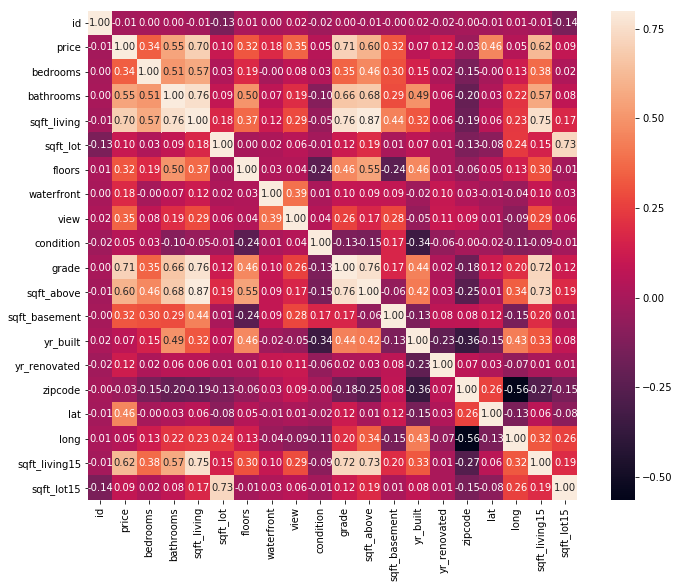

In [140]:
#Generating heatmap 

corrmat = house_data.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, cbar = True, annot = True, fmt='.2f', vmax = 0.8, square = True)

In [633]:
import folium # for map visualization
from folium import plugins

houses_heatmap = folium.Map(location = [house_data['lat'].mean(), house_data['long'].mean()], zoom_start = 9)
houses_heatmap.add_children(plugins.HeatMap([[row["lat"], row["long"]] for name, row in house_data.iterrows()]))
#houses_heatmap.create_map("heatmap.html")
houses_heatmap

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [602]:
feature_columns = ['bedrooms','bathrooms','sqft_living', 'floors','view_0','view_1','view_2','view_3','view_4','lat', 'age_house','Is_renovated','waterfront_0','waterfront_1', 'grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13','condition_1','condition_2','condition_3','condition_4','condition_5','zipcode_98002','zipcode_98005','zipcode_98053','zipcode_98074','zipcode_98075','zipcode_98119','zipcode_98146','zipcode_98199','zipcode_98040','zipcode_98039','zipcode_98004','zipcode_98007','zipcode_98008']
#sqft_living15 doesn't affect r2. increases rmse 
# 3 festures -> r2= 47, rmse = 0.16
# floors -> r2 -> 50% 3% increase while rmse increased slightly 0.1666
# view -> r2 52% rmse 0.158
# sqft_above -> r2 decrease 51 rmse 0.16 reject
# sqft_basement -> r2 52 rmse 0.16 reject
# yr_built -> r2 55.7 rmse 0.153
# waterfront -> r2 55.1  rmse 0.1511
# grade -> r2 65.1 rmse 0.135
# condition -> r2 67.7 rmse 0.133
# replacing yr_built with age of house 66.94 0.134
# Is_renovated 65.85 0.135


X = house_data[feature_columns]

y = house_data['price']

In [616]:
# Split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [617]:
print("Features Training Data Shape",X_train.shape)
print("Response Training Data Shape",y_train.shape)
print("Features Test Data Shape",X_test.shape)
print("Response Test Data Shape",y_test.shape)

Features Training Data Shape (11999, 42)
Response Training Data Shape (11999,)
Features Test Data Shape (4000, 42)
Response Test Data Shape (4000,)


In [618]:
linreg = LinearRegression()

# Fit model 

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [619]:
print("Intercept -> ", linreg.intercept_)
print("Coefficients -> ", linreg.coef_)

zip(feature_columns, linreg.coef_)

Intercept ->  -20.758637996866096
Coefficients ->  [-7.38782433e-03  2.54576732e-02  8.12253994e-05  3.03816620e-02
 -7.07647968e-02 -6.40822301e-03 -1.10398371e-02  1.52552506e-02
  7.29576063e-02  5.46709878e-01  1.43313304e-03  1.34093293e-02
 -7.44110758e-02  7.44110758e-02 -3.82926982e-02  2.64455749e-02
  9.19247486e-02  1.74034736e-01  2.50196937e-01  3.25478009e-01
  3.70240496e-01  3.99151643e-01  4.40090881e-01  4.20614943e-01
 -4.91934923e-02 -6.00519245e-02  1.23113358e-02  3.24300148e-02
  6.45040661e-02 -4.17769939e-02  1.03109510e-01  3.36072178e-02
  2.40232302e-02  5.37827012e-02  1.20581530e-01 -4.43332184e-02
  8.39120799e-02  1.70482408e-01  3.26866173e-01  2.56759416e-01
  5.86644227e-02  6.68264596e-02]


In [620]:
# Making predictions

y_pred = linreg.predict(X_test)

In [634]:
#print("mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

#print("mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

print("root mean square Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

root mean square Error:  0.10241824411512848


In [622]:
#linreg.score(X_test, y_test)
metrics.r2_score(y_test, y_pred)

0.811630512044468

In [628]:
#Lasso and Ridge

from sklearn import metrics

lm_lasso = Lasso()
lm_ridge = Ridge()

lm_lasso.fit(X_train, y_train)
lm_ridge.fit(X_train, y_train)

scores = cross_val_score(lm_lasso, X_test, y_test, cv =10)
print("Lasso score: %s"%scores.mean())
y_lassopred = lm_lasso.predict(X_test)
print("Lasso RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# ridge

scores = cross_val_score(lm_ridge, X_test, y_test, cv =10)
print("Ridge score: %s" %scores.mean())
y_ridgepred = lm_ridge.predict(X_test)
print("Ridge RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Lasso score: 0.5124300596896625
Lasso RMSE:  0.10241824411512848
Ridge score: 0.8115728389846266
Ridge RMSE:  0.10241824411512848


In [625]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1662.
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        04:50:26   Log-Likelihood:                 13762.
No. Observations:               15999   AIC:                        -2.744e+04
Df Residuals:                   15959   BIC:                        -2.714e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0077      0.001     -6.831      0.000      -0.010      -0.005
bathrooms         0.0262      0.002     13.615      0.000       0.022       0.030
sqft_living    8.039e-05   1.88e-06     42.664      0.000    7.67e-05    8.41e-05
floors            0.0318      0.002     16.259      0.000       0.028       0.036
view_0           -4.6878      0.068    -69.289      0.000      -4.820      -4.555
view_1           -4.6279      0.068    -68.204      0.000      -4.761      -4.495
view_2           -4.6276      0.068    -68.450      0.000      -4.760      -4.495
view_3           -4.6040      0.068    -68.150      0.000      -4.736      -4.472
view_4           -4.5578      0.068    -67.050      0.000      -4.691      -4.425
lat               0.5488      0.006     86.504      0.000       0.536       0.561
age_house         0.0015   4.19e-05     35.267      0.000       0.001       0.002
Is_renovated      0.0142      0.004      3.362      0.001       0.006       0.022
waterfront_0    -11.6307      0.169    -68.806      0.000     -11.962     -11.299
waterfront_1    -11.4744      0.169    -67.933      0.000     -11.805     -11.143
grade_4          -0.0718      0.056     -1.274      0.203      -0.182       0.039
grade_5          -0.0499      0.052     -0.958      0.338      -0.152       0.052
grade_6           0.0167      0.052      0.324      0.746      -0.085       0.118
grade_7           0.1019      0.052      1.970      0.049       0.001       0.203
grade_8           0.1777      0.052      3.433      0.001       0.076       0.279
grade_9           0.2548      0.052      4.913      0.000       0.153       0.356
grade_10          0.3002      0.052      5.771      0.000       0.198       0.402
grade_11          0.3283      0.052      6.270      0.000       0.226       0.431
grade_12          0.3823      0.054      7.125      0.000       0.277       0.488
grade_13          0.3564      0.066      5.430      0.000       0.228       0.485
condition_1      -4.7037      0.070    -67.053      0.000      -4.841      -4.566
condition_2      -4.6629      0.068    -68.696      0.000      -4.796      -4.530
condition_3      -4.6027      0.068    -67.849      0.000      -4.736      -4.470
condition_4      -4.5826      0.068    -67.742      0.000      -4.715      -4.450
condition_5      -4.5532      0.068    -67.226      0.000      -4.686      -4.420
zipcode_98002    -0.0453      0.009     -5.133      0.000      -0.063      -0.028
zipcode_98005     0.0986      0.009     10.675      0.000       0.081       0.117
zipcode_98053     0.0357      0.006      5.884      0.000       0.024       0.048
zipcode_98074     0.0174      0.006      2.995      0.003       0.006       0.029
zipcode_98075     0.0532      0.006      8.411      0.000       0.041       0.066
zipcode_98119     0.1186      0.009     13.173   

In [560]:
y_values = pd.DataFrame({'Actual price' : y_test})
y_values
len(y_values)

4000

In [561]:
y_values1 = pd.DataFrame({'Predicted value' : y_pred})
y_values1
len(y_values1)

4000

In [562]:
y_values.reset_index(drop = True, inplace = True)
y_values1.reset_index(drop = True, inplace = True)

y_comp = pd.concat([y_values, y_values1], axis = 1)
y_comp.head()

,Actual price,Predicted value
0,5.900913,5.762815
1,5.942008,5.903748
2,6.064458,6.272285
3,5.096910,5.459282
4,5.620656,5.716371


In [567]:
y_comp['Predicted ex value'] = np.power(10,y_values1['Predicted value'])



In [565]:
y_comp.head()

,Actual price,Predicted value,Predicted ex value
0,5.900913,5.762815,5.791819e+05
1,5.942008,5.903748,8.012129e+05
2,6.064458,6.272285,1.871911e+06
3,5.096910,5.459282,2.879265e+05
4,5.620656,5.716371,5.204409e+05


In [591]:
         # Saving the model  
import pickle
filename = 'midtermproject_model.sav'
pickle.dump(linreg, open(filename, 'wb'))

In [573]:
'''
test set
'''

housetest_data = pd.read_csv("test_set.csv")



In [574]:
housetest_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,98020220,20141030T000000,4,2.50,3210,8938,2.0,0,0,3,10,3210,0,2005,0,98075,47.5820,-121.971,3740,8108
1,9320350020,20140630T000000,4,3.00,2330,3497,2.0,0,0,3,9,1920,410,2003,0,98108,47.5540,-122.308,2330,5242
2,7899800857,20141215T000000,2,2.00,1070,635,2.0,0,0,3,9,720,350,2008,0,98106,47.5212,-122.357,1070,928
3,3904990030,20140709T000000,4,2.50,2570,5250,2.0,0,0,3,8,2570,0,1990,0,98029,47.5763,-122.000,2260,5392
4,4100000050,20141030T000000,3,1.75,2080,11866,1.0,0,0,3,8,2080,0,1960,0,98005,47.5872,-122.173,2240,10696


In [575]:
housetest_data.shape

(4222, 20)

In [576]:
print(housetest_data.isnull().values.any())

False


In [577]:
housetest_data.drop_duplicates(inplace = True)
housetest_data.shape

(4222, 20)

In [578]:
housetest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 4221
Data columns (total 20 columns):
id               4222 non-null int64
date             4222 non-null object
bedrooms         4222 non-null int64
bathrooms        4222 non-null float64
sqft_living      4222 non-null int64
sqft_lot         4222 non-null int64
floors           4222 non-null float64
waterfront       4222 non-null int64
view             4222 non-null int64
condition        4222 non-null int64
grade            4222 non-null int64
sqft_above       4222 non-null int64
sqft_basement    4222 non-null int64
yr_built         4222 non-null int64
yr_renovated     4222 non-null int64
zipcode          4222 non-null int64
lat              4222 non-null float64
long             4222 non-null float64
sqft_living15    4222 non-null int64
sqft_lot15       4222 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 692.7+ KB


In [579]:
# Convert grade to Category and add dummy variables
housetest_data['grade'] = pd.Categorical(housetest_data["grade"])
housetest_data['waterfront'] = pd.Categorical(housetest_data["waterfront"])
housetest_data['condition'] = pd.Categorical(housetest_data["condition"])

housetest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 4221
Data columns (total 20 columns):
id               4222 non-null int64
date             4222 non-null object
bedrooms         4222 non-null int64
bathrooms        4222 non-null float64
sqft_living      4222 non-null int64
sqft_lot         4222 non-null int64
floors           4222 non-null float64
waterfront       4222 non-null category
view             4222 non-null int64
condition        4222 non-null category
grade            4222 non-null category
sqft_above       4222 non-null int64
sqft_basement    4222 non-null int64
yr_built         4222 non-null int64
yr_renovated     4222 non-null int64
zipcode          4222 non-null int64
lat              4222 non-null float64
long             4222 non-null float64
sqft_living15    4222 non-null int64
sqft_lot15       4222 non-null int64
dtypes: category(3), float64(4), int64(12), object(1)
memory usage: 606.8+ KB


In [581]:
# Calculating age of house from yr_built

housetest_data['year_sold'] = housetest_data['date'].apply(lambda x: int(x[:4]))
housetest_data['age_house'] = housetest_data[['year_sold']].sub(housetest_data['yr_built'], axis = 0)

In [582]:
housetest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 0 to 4221
Data columns (total 22 columns):
id               4222 non-null int64
date             4222 non-null object
bedrooms         4222 non-null int64
bathrooms        4222 non-null float64
sqft_living      4222 non-null int64
sqft_lot         4222 non-null int64
floors           4222 non-null float64
waterfront       4222 non-null category
view             4222 non-null int64
condition        4222 non-null category
grade            4222 non-null category
sqft_above       4222 non-null int64
sqft_basement    4222 non-null int64
yr_built         4222 non-null int64
yr_renovated     4222 non-null int64
zipcode          4222 non-null int64
lat              4222 non-null float64
long             4222 non-null float64
sqft_living15    4222 non-null int64
sqft_lot15       4222 non-null int64
year_sold        4222 non-null int64
age_house        4222 non-null int64
dtypes: category(3), float64(4), int64(14), object(1)
memory 

In [584]:
# is renovated columns

housetest_data['Is_renovated'] = housetest_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [585]:
''' converting is renovated to category
house_data['grade'] = pd.Categorical(house_data["grade"])
'''

housetest_data['Is_renovated'] = pd.Categorical(housetest_data["Is_renovated"])

In [586]:
housetest_data['zipcode'] = pd.Categorical(housetest_data["zipcode"])

In [587]:
housetest_data = pd.get_dummies(housetest_data, columns = ['view'], prefix = ['view'])



In [590]:
list(housetest_data.columns.values)

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year_sold',
 'age_house',
 'Is_renovated',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 '

In [589]:
housetest_data = pd.get_dummies(housetest_data, columns = ['zipcode'], prefix = ['zipcode'])
housetest_data = pd.get_dummies(housetest_data, columns = ['waterfront'], prefix = ['waterfront'])
housetest_data = pd.get_dummies(housetest_data, columns = ['condition'], prefix = ['condition'])
housetest_data = pd.get_dummies(housetest_data, columns = ['grade'], prefix = ['grade'])

In [611]:
feature_columns = ['bedrooms','bathrooms','sqft_living', 'floors','view_0','view_1','view_2','view_3','view_4','lat', 'age_house','Is_renovated','waterfront_0','waterfront_1', 'grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13','condition_1','condition_2','condition_3','condition_4','condition_5','zipcode_98002','zipcode_98005','zipcode_98053','zipcode_98074','zipcode_98075','zipcode_98119','zipcode_98146','zipcode_98199','zipcode_98040','zipcode_98039','zipcode_98004','zipcode_98007','zipcode_98008']

X_test1 = housetest_data[feature_columns]

In [600]:
linear_reg = LinearRegression()

In [610]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [612]:
y_pred = linear_reg.predict(X_test1)
print(y_pred)

[5.91428326 5.74316131 5.60522205 ... 5.60948892 5.39599551 5.34493379]


In [614]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(y_pred, columns=['predicted price']).to_csv('prediction.csv')

In [635]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_0,view_1,view_2,view_3,view_4
count,1.599900e+04,15999.000000,15999.000000,15999.000000,15999.000000,1.599900e+04,15999.000000,15999.000000,15999.000000,15999.000000,...,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.00000,15999.000000,15999.000000
mean,4.577197e+09,5.664873,3.371836,2.096678,2071.899994,1.512935e+04,1.469967,1775.069629,296.830364,1969.654353,...,0.012313,0.012626,0.006125,0.013001,0.015251,0.900181,0.015751,0.04494,0.024439,0.014688
std,2.871367e+09,0.230349,0.933431,0.760990,906.483700,3.936449e+04,0.528995,816.175997,446.143755,28.907862,...,0.110283,0.111656,0.078027,0.113281,0.122553,0.299768,0.124514,0.20718,0.154413,0.120306
min,1.000102e+06,4.875061,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.125049e+09,5.505150,3.000000,1.500000,1420.000000,5.150000e+03,1.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,3.904920e+09,5.653213,3.000000,2.250000,1910.000000,7.702000e+03,1.000000,1550.000000,0.000000,1973.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,7.304301e+09,5.809560,4.000000,2.500000,2540.000000,1.080050e+04,2.000000,2190.000000,580.000000,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
max,9.900000e+09,6.886491,33.000000,8.000000,12050.000000,1.074218e+06,3.500000,8860.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
